In [35]:
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, kendalltau, linregress
import numpy as np
import warnings
import scipy.stats as stats

warnings.simplefilter(action='ignore', category=pd.core.common.SettingWithCopyWarning)
pandas2ri.activate()
sdcMicro = importr('sdcMicro')

In [45]:
import sys
sys.path.append("..")  
import metaprivBIDS_stat as ST
from metapriv_stat import plot_calc
from metapriv_stat import rst_outlier_case2

In [37]:
DALLAS = 'https://s3.amazonaws.com/openneuro.org/ds004856/participants.tsv?versionId=IwNXA1rR0LIzEtfMB3kPETHQpZzbovbu'
DALLAS = pd.read_csv(DALLAS, sep='\t')
DALLAS.to_csv('data_ds004856/DALLAS_dataset_ds003097.csv', sep=',', index=False)

na_percentage = DALLAS.isna().mean() * 100
na_percentage = na_percentage[na_percentage >= 10].sort_values(ascending=False)
na_percentage

AgePETTau_W2    87.068966
PETAmyW2toW3    84.267241
AgePETAmy_W3    83.620690
PETAmyW1toW3    83.405172
AgePETTau_W3    73.275862
MRIW2toW3       61.422414
AgePETAmy_W2    61.206897
PETAmyW1toW2    60.991379
AgeMRI_W3       58.405172
MRIW1toW3       58.405172
CogW2toW3       55.172414
AgeCog_W3       53.663793
CogW1toW3       53.448276
MMSE_W3         52.586207
BMI_W2          44.827586
Weight_W2       44.827586
Height_W2       44.827586
AgePETAmy_W1    36.422414
MRIW1toW2       35.344828
AgeMRI_W2       35.344828
MMSE_W2         28.663793
CogW1toW2       27.370690
AgeCog_W2       27.370690
dtype: float64

In [38]:
suda = pd.read_csv('data_ds004856/suda_ds004856.csv', sep=',')
pif = pd.read_csv('data_ds004856/pif_df004856.csv', sep=',',index_col='Unnamed: 0').sort_index()
suda_field_score =  pd.read_csv('data_ds004856/att_suda.csv', sep=',').drop(columns=['Unnamed: 0'], errors='ignore')
k_combined_field =  pd.read_csv('data_ds004856/normalized_difference_dallas.csv', sep=',').drop(columns=['Difference in Unique Rows','Unique Rows After Removal']).rename(columns={'Column': 'variable'})
k_combined_all = pd.read_csv('data_ds004856/k-combined-3-to-11.csv', sep=',')
k_combined_field_non_risk = pd.read_csv('data_ds004856/normalized_difference_results_non.csv', sep=',').drop(columns=['Difference in Unique Rows','Unique Rows After Removal']).rename(columns={'Column': 'variable'})


        ROW LEVEL CORRELATION      

Spearman Rank Correlation between suda & pif: 0.57, P-value: 0.0000
Kendall's Tau between suda & pif: 0.40, p-value: 0.0000


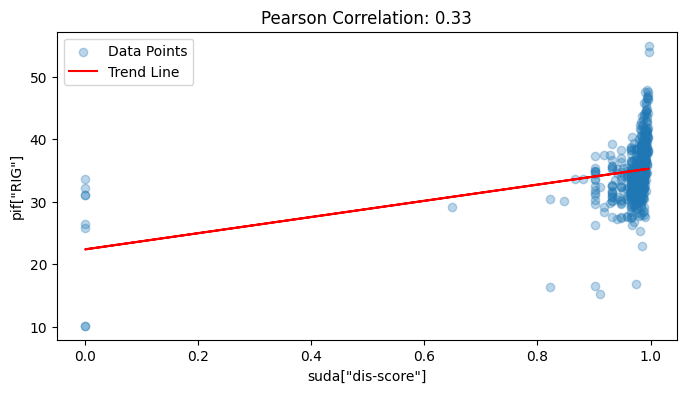

____________________________________________________________________________________

      FIELD LEVEL CORRELATIONS     

Pearson Correlation between SUDA & PIF field level: 0.83
Pearson Correlation between K-combined & PIF field level: 0.69
Pearson Correlation between SUDA & K-combined field level: 0.76


Spearman Rank Correlation between PIF & SUDA: 0.71, P-value: 0.0713
Spearman Rank Correlation between PIF & K: 0.80, P-value: 0.0301
Spearman Rank Correlation between SUDA & K: 0.40, P-value: 0.3728


In [39]:
ST.stats(suda, pif, suda_field_score, k_combined_field)

In [143]:
sum_score_df  = ST.calculate_summed_dis_scores(k_combined_all, DALLAS, sample_fraction=0.3, missing_value= np.nan)

Spearman Correlation between Suda sum and K-combined: 0.73
Pearson correlation to Suda sum & K-combined 0.5633109674666663
________________________________________________________________________
Pearson Correlation: 0.5633109674666663


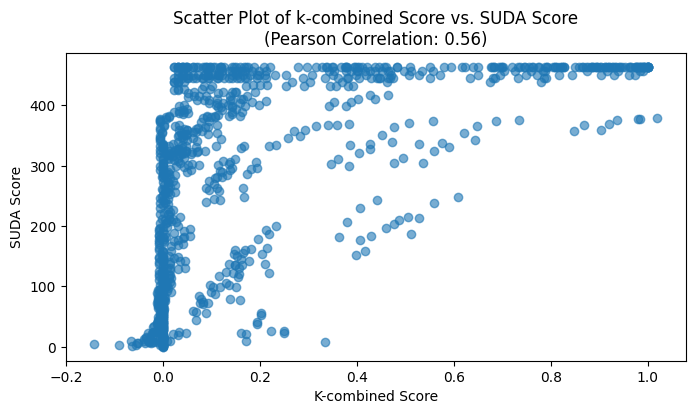

________________________________________________________________________


Spearman Correlation between PIF 95% and K-combined: 0.80
Pearson correlation to PIF 95% & K-combined 0.7733340549170992


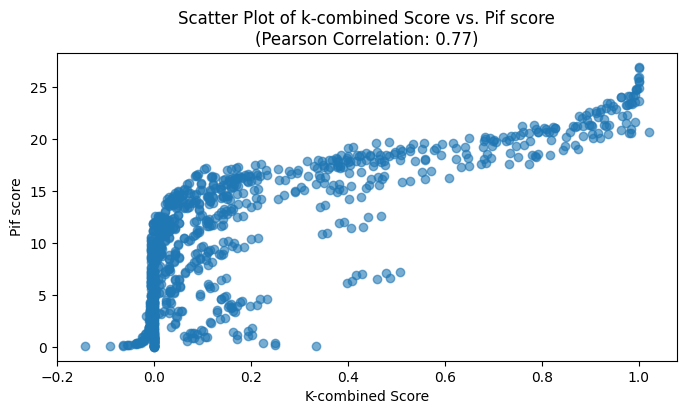

________________________________________________________________________


Spearman Correlation between PIF 95% and SUDA: 0.84
Pearson correlation to PIF 95% & SUDA 0.8214976280667218


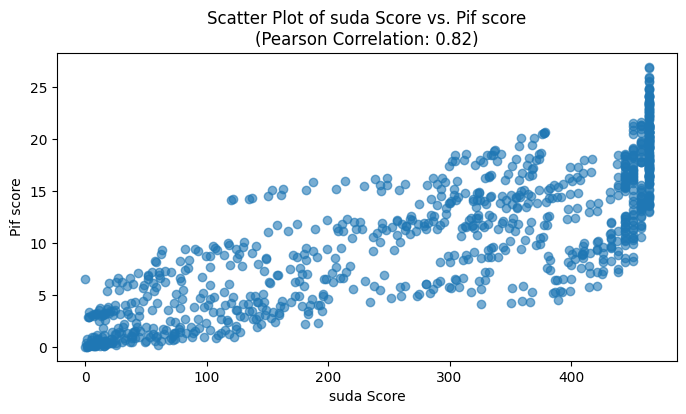

In [146]:
plot_calc(sum_score_df)

# T-test between risky and non-risky k-global values for variables. 


### Non risk variables

In [8]:
k_combined_field_non_risk

,variable,Normalized Difference
0,MMSE_W3,0.0
1,MMSE_W2,0.0
2,MMSE_W1,0.0
3,Height_W2,0.0
4,AgePETTau_W2,0.0
5,BMI_W1,0.0
6,BMI_W2,0.0
7,CogW1toW3,0.0
8,CogW2toW3,0.0
9,MRIW1toW3,0.0


### Risk Variables 

In [12]:
k_combined_field

,variable,Normalized Difference
0,AgeCog_W1,1.6
1,Height_W1,1.3
2,HandednessScore,0.3
3,EduYrsEstCap,0.0
4,Race,0.0
5,EduComp,0.0
6,Sex,0.0
7,Ethnicity,0.0


### Test

In [13]:
mean_risk_values = (k_combined_field['Normalized Difference']).mean()
print('Mean, risk identifiers:',mean_risk_values)

Mean, risk identifiers: 0.4


In [14]:
mean_risk_values = (k_combined_field_non_risk['Normalized Difference']).mean()
print('Mean, non-risk identifiers:',mean_risk_values)

Mean, non-risk identifiers: 0.0


In [17]:
t, p = stats.ttest_ind(k_combined_field['Normalized Difference'], k_combined_field_non_risk['Normalized Difference'])
print('t:',t,'p-value:', p)

t: 3.2632406432560748 p-value: 0.002565193272726757


### PIF & SUDA Outliers 

In [18]:
#SUDA
class_outliers, madn, mad, outlier_indices, above_outlier_indices = ST.rst_outlier_case2(suda, 'dis-score')

In [19]:
print(len(above_outlier_indices))

0


In [20]:
#PIF
class_outliers, madn, mad, outlier_indices, above_outlier_indices = rst_outlier_case2(pif, 'RIG')
print(len(above_outlier_indices))

14


In [21]:
outlier_indices

[25,
 32,
 48,
 51,
 58,
 128,
 172,
 179,
 181,
 191,
 216,
 279,
 316,
 319,
 328,
 353,
 356,
 366,
 379,
 407,
 457]

In [44]:
column_names = [
    
    "participant_id",
    "AgeCog_W1",
    "Height_W1",
    "HandednessScore",
    "EduYrsEstCap",
    "Race",
    "EduComp",
    "Sex",
    "Ethnicity"
]
DALLAS[column_names].loc[58]

participant_id     sub-1362
AgeCog_W1                54
Height_W1              61.0
HandednessScore       3.909
EduYrsEstCap           20.0
Race                      3
EduComp                 5.0
Sex                       f
Ethnicity               1.0
Name: 58, dtype: object